## Teachable Machine - Classification of Rock, Paper, Scissors

## Test the model with images

Let's import necessary packages.

In [1]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

Load the trained model.

In [2]:
# Disable scientific notation for clarity
np.set_printoptions(suppress=True)
 
# Load the model
model = load_model("model/keras_model.h5", compile=False) 

# Load the labels
class_names = open("model/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

Test the model using a specified image (Ex. Image 16 from the paper samples).

In [6]:
# Replace this with the path to your image
image = Image.open("samples/paper/16.jpg").convert("RGB") 

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)

1/1 [==============================] - 1s 1s/step
Class: paper
Confidence Score: 0.9999901


Display the image using matplotlib

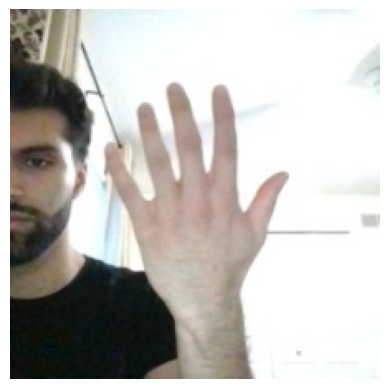

In [9]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.axis('off')
plt.show()